In [3]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("./datasets/housing.csv", header=None, delimiter=r"\s+", names=column_names)

In [4]:
y_target = df['MEDV']
X_data = df.drop(['MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [6]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(f' 5 교차 검증의 평균 RMSE : {avg_rmse:.3f}')

 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg]
for model in models:
	neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
	rmse_scores = np.sqrt(-1 * neg_mse_scores)
	avg_rmse = np.mean(rmse_scores)

	print('######', model, '######')
	print(f' 5 교차 검증의 평균 RMSE : {avg_rmse:.3f}')

###### DecisionTreeRegressor(max_depth=4, random_state=0) ######
 5 교차 검증의 평균 RMSE : 5.978
###### RandomForestRegressor(n_estimators=1000, random_state=0) ######
 5 교차 검증의 평균 RMSE : 4.423
###### GradientBoostingRegressor(n_estimators=1000, random_state=0) ######
 5 교차 검증의 평균 RMSE : 4.269


<Axes: >

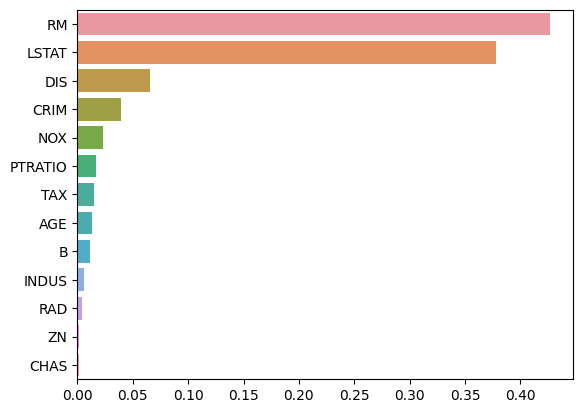

In [10]:
import seaborn as sns
%matplotlib inline

rf_reg.fit(X_data, y_target)
feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)